In [1]:
#实验3.2DBSCAN

import matplotlib.pyplot as plt

In [2]:
#1.数据生成
from  sklearn import datasets
x,y=datasets.make_moons(n_samples=100,noise=0.005,random_state=666)

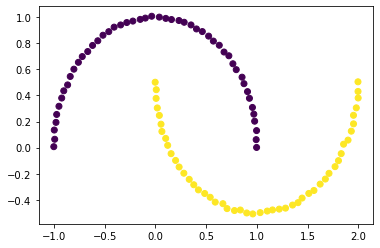

In [3]:
#2.可视化
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [4]:
#3.自定义DBSCAN
import mindspore.numpy as np
import random

In [5]:
# 寻找eps邻域内的点
def findNeighbor(j,x,eps):
    N=[]
    for p in range(x.shape[0]):
        temp=np.sqrt(np.sum(np.square(x[j]-x[p])))
        if(temp<=eps):
            N.append(p)

    return N


In [6]:
#DBSCAN算法
def dbscan(x,eps,min_pts):
    """
    inpyt:x样本数据
    eps:邻域半径
    min_pts:最少点数
    """
    k=-1
    Neighborpts=[]
    Ner_Neighborpts=[]
    fil=[]
    gama=[x for x in range(len(x))]
    cluster=[-1 for y in range(len(x))]
    while len(gama)>0:
        j=random.choice(gama)
        gama.remove(j)
        fil.append(j)
        Neighborpts=findNeighbor(j,x,eps)
        if len(Neighborpts)<min_pts:
            cluster[j]=-1
        else:
            k=k+1
            cluster[j]=k
            for i in Neighborpts:
                if i not in fil:
                    gama.remove(i)
                    fil.append(i)
                    Ner_Neighborpts=findNeighbor(i,x,eps)

                    if len(Ner_Neighborpts)>=min_pts:
                        for a in Ner_Neighborpts:
                            if a not in Neighborpts:
                                Neighborpts.append(a)
                    if (cluster[i]==-1):
                        cluster[i]=k

    return cluster


In [7]:
#对数据集进行聚类
x_new=[]
for i in x:
    x_new.append(i)
x_new=np.array(x_new)
y_pred=dbscan(x_new,eps=0.5,min_pts=10)
#4.计算吻合度
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_pred)
print('acc:{:.2f}%'.format(acc*100))


acc:100.00%


[0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1]


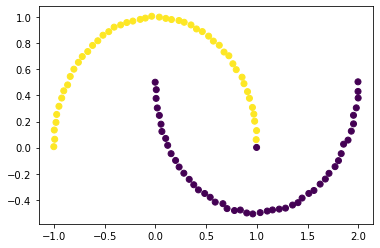

In [8]:
#5.直接调用DBSCAN
from sklearn.cluster import DBSCAN
dbscan_sk=DBSCAN(eps=0.5,min_samples=10)
result=dbscan_sk.fit_predict(x)
print(result)
plt.scatter(x[:,0],x[:,1],c=result)
plt.show()